# Testing Masks

In [4]:
import sys
import os

# Get absolute path to the real src folder (repo root + src)
repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, os.path.join(repo_root, "src"))

import fourieroptics as fo

## Create Square Grating

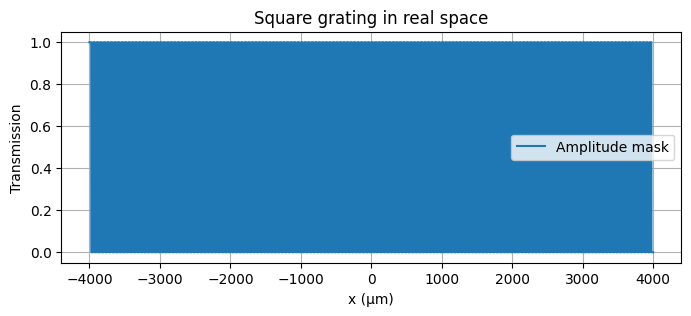

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Grid
N = 80000
dx = 1e-7
x = fo.coords_1D(N, dx)

# Grating parameters
period = 50e-6   # 50 µm
duty = 0.5

# Generate grating (amplitude version)
G = fo.square_grating_1D(x, period, duty_cycle=duty)

plt.figure(figsize=(8,3))
plt.plot(x*1e6, np.real(G), label="Amplitude mask")
plt.xlabel("x (µm)")
plt.ylabel("Transmission")
plt.title("Square grating in real space")
plt.grid(True)
plt.legend()
plt.show()


## Propagate

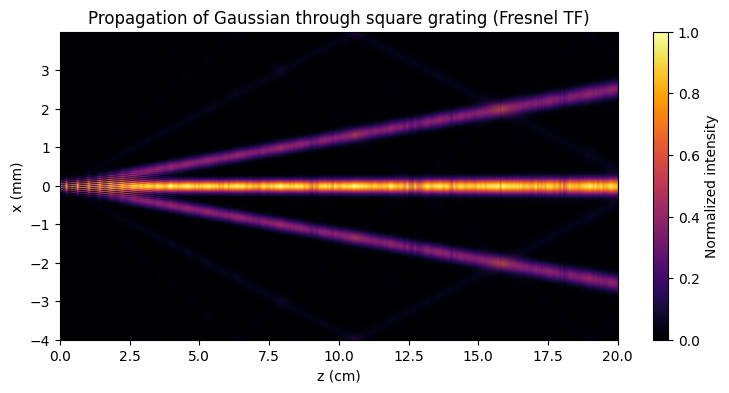

In [8]:
# Beam parameters
wavelength = 633e-9
z_max = 0.2        # max propagation distance = 20 cm
w0 = 200e-6        # waist of Gaussian

# Input Gaussian
E0 = fo.gaussian_beam_1D(x, w0)

# Multiply by grating mask
E_after = E0 * G

# Propagate with Fresnel using z_step
I_map, z_vals = fo.z_step_1D(E_after, x, fo.fresnel_tf_1D,
                             wavelength, z_range=z_max, n_points=300)

# Plot z-step intensity evolution
plt.figure(figsize=(9,4))
plt.imshow(I_map,
           extent=[z_vals[0]*100, z_vals[-1]*100, x[0]*1e3, x[-1]*1e3],
           aspect='auto', origin='lower', cmap='inferno')
plt.xlabel("z (cm)")
plt.ylabel("x (mm)")
plt.title("Propagation of Gaussian through square grating (Fresnel TF)")
plt.colorbar(label="Normalized intensity")
plt.show()
